## Custom Dataset 

In [1]:
import torch
import torch.nn.functional as F

import numpy as np

from torch.utils.data import Dataset
from torch.utils.data import DataLoader

In [2]:
# torch.utils.data.Dataset 상속받아 데이터로더 생성

class MyDataset(torch.utils.data.Dataset): 
    def __init__(self, x_data, y_data):  # 초기값 설정
        self.x_data = x_data
        self.y_data = y_data
        
    def __len__(self):  # 데이터 전체 길이
         return len(self.y_data)

    # iterator 부를 때, 특정 index 값으로 부른다
    # Tensor로 바꿔서 던져줘야 한다
    def __getitem__(self, idx):
        x = torch.FloatTensor(self.x_data[idx])
        y = torch.FloatTensor(self.y_data[idx])
        return x, y

In [3]:
data_x = np.linspace(1.0, 10.0, 100)[:, np.newaxis]
data_y = np.sin(data_x) + 0.1*np.power(data_x,2) + 0.5*np.random.randn(100,1)

In [4]:
dataset = MyDataset(data_x, data_y)

dataloader = DataLoader(dataset, batch_size=2, shuffle=True)  # iterator

In [5]:
model = torch.nn.Linear(1,1)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)

In [6]:
nb_epochs = 20
for epoch in range(nb_epochs + 1):
    for batch_idx, samples in enumerate(dataloader):
        x_train, y_train = samples
        prediction = model(x_train)

        # cost 계산
        cost = F.mse_loss(prediction, y_train)

        # cost로 H(x) 계산
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        print('Epoch {:4d}/{} Batch {}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, batch_idx+1, len(dataloader),
            cost.item()
            ))

Epoch    0/20 Batch 1/50 Cost: 0.278492
Epoch    0/20 Batch 2/50 Cost: 2.563482
Epoch    0/20 Batch 3/50 Cost: 3.310523
Epoch    0/20 Batch 4/50 Cost: 2.964550
Epoch    0/20 Batch 5/50 Cost: 1.049005
Epoch    0/20 Batch 6/50 Cost: 0.059370
Epoch    0/20 Batch 7/50 Cost: 5.252050
Epoch    0/20 Batch 8/50 Cost: 1.088313
Epoch    0/20 Batch 9/50 Cost: 2.212759
Epoch    0/20 Batch 10/50 Cost: 0.881070
Epoch    0/20 Batch 11/50 Cost: 6.452033
Epoch    0/20 Batch 12/50 Cost: 7.363186
Epoch    0/20 Batch 13/50 Cost: 0.459536
Epoch    0/20 Batch 14/50 Cost: 1.286905
Epoch    0/20 Batch 15/50 Cost: 6.612142
Epoch    0/20 Batch 16/50 Cost: 4.398744
Epoch    0/20 Batch 17/50 Cost: 1.562582
Epoch    0/20 Batch 18/50 Cost: 0.891427
Epoch    0/20 Batch 19/50 Cost: 1.834625
Epoch    0/20 Batch 20/50 Cost: 8.383552
Epoch    0/20 Batch 21/50 Cost: 1.567828
Epoch    0/20 Batch 22/50 Cost: 2.680629
Epoch    0/20 Batch 23/50 Cost: 4.801071
Epoch    0/20 Batch 24/50 Cost: 6.108284
Epoch    0/20 Batch 25/50

## Image to Tensor

![title](flag.png)


In [9]:
from PIL import Image  # python에서 이미지 처리
import numpy as np

import os
os.getcwd()

'/content'

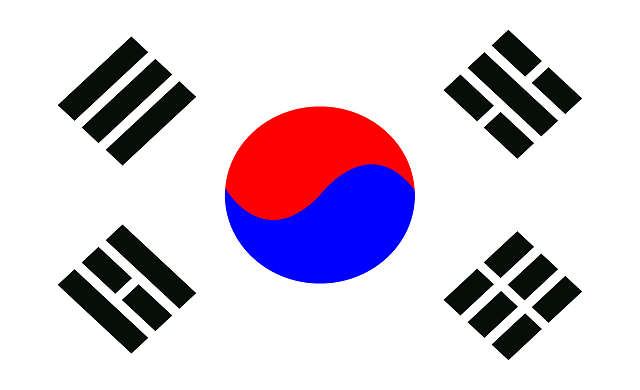

In [11]:
path = os.path.join("/content", "drive", "MyDrive", "Colab Notebooks", "lecture-note-python-basics-for-ai", "codes", "pytorch", "01_mlp", "dataset", "flag.png")
img = Image.open(path)
img

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
np_img_array = np.array(img.getdata())  # getdata() : 이미지를 하나의 array로 표현 가능
np_img_array.shape

(249600, 4)

In [13]:
from torchvision import transforms as transforms
result = transforms.ToTensor()(img)  # 이미지 파일에 대한 shape 구할 수 있다
# transform : 데이터를 tensor로 변환해주는 코드

In [14]:
result.shape

torch.Size([4, 390, 640])

In [15]:
img_array = transforms.ToPILImage()(result).convert("RGB")
img_array.size

(640, 390)

In [16]:
type(img_array)

PIL.Image.Image

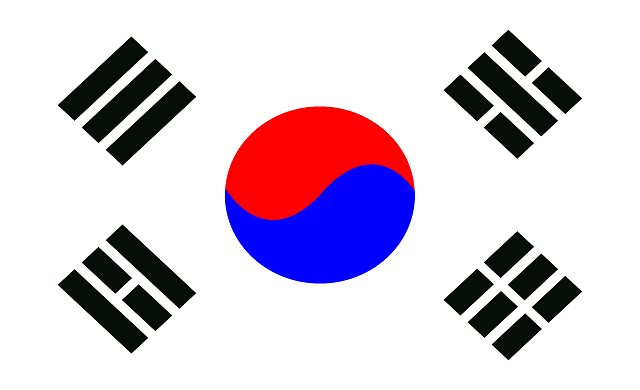

In [17]:
img_array

## MNIST 

In [19]:
!wget http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz

--2021-02-02 02:24:07--  http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 172.67.171.76, 104.21.29.36, 2606:4700:3034::6815:1d24, ...
Connecting to yann.lecun.com (yann.lecun.com)|172.67.171.76|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9912422 (9.5M) [application/x-gzip]
Saving to: ‘train-images-idx3-ubyte.gz’

train-images-idx3-u 100%[===================>]   9.45M  10.9MB/s    in 0.9s    

2021-02-02 02:24:08 (10.9 MB/s) - ‘train-images-idx3-ubyte.gz’ saved [9912422/9912422]



In [20]:
!gunzip train-images-idx3-ubyte.gz  # 압축 풀어준다

In [37]:
import sys
import pprint

pprint.pprint(sys.path)

['',
 '/env/python',
 '/usr/lib/python36.zip',
 '/usr/lib/python3.6',
 '/usr/lib/python3.6/lib-dynload',
 '/usr/local/lib/python3.6/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.6/dist-packages/IPython/extensions',
 '/root/.ipython']


In [38]:
!pip3 install --user idx2numpy


In [41]:
sys.path.append('/root/.local/lib/python3.6/site-packages')

In [42]:
import idx2numpy

In [43]:
import numpy as np
file = 'train-images-idx3-ubyte'
arr = idx2numpy.convert_from_file(file)  # 일종의 pickle 파일

In [44]:
arr.shape


(60000, 28, 28)

In [45]:
arr

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 